<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


### 1. Import the data

In [2]:
ais = pd.read_csv('../../../DATA/ais.csv')

In [3]:
ais.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 2. Do some EDA of relationships between features.

In [4]:
ais.shape

(202, 14)

In [5]:
ais.dtypes

Unnamed: 0      int64
rcc           float64
wcc           float64
hc            float64
hg            float64
ferr            int64
bmi           float64
ssf           float64
pcBfat        float64
lbm           float64
ht            float64
wt            float64
sex            object
sport          object
dtype: object

In [6]:
# Number of unique values in the dataset
ais.nunique()

Unnamed: 0    202
rcc           114
wcc            70
hc            105
hg             55
ferr          111
bmi           180
ssf           176
pcBfat        180
lbm           135
ht            147
wt            161
sex             2
sport          10
dtype: int64

In [7]:
ais.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,202.0,101.500000,58.456537,1.00,51.2500,101.500,151.750,202.00
rcc,202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
wcc,202.0,7.108911,1.800337,3.30,5.9000,6.850,8.275,14.30
hc,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
hg,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
ferr,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
bmi,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
ssf,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
pcBfat,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52
lbm,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00


In [8]:
ais.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [9]:
# check for nulls
ais.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [10]:
# Drop nulls
ais.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


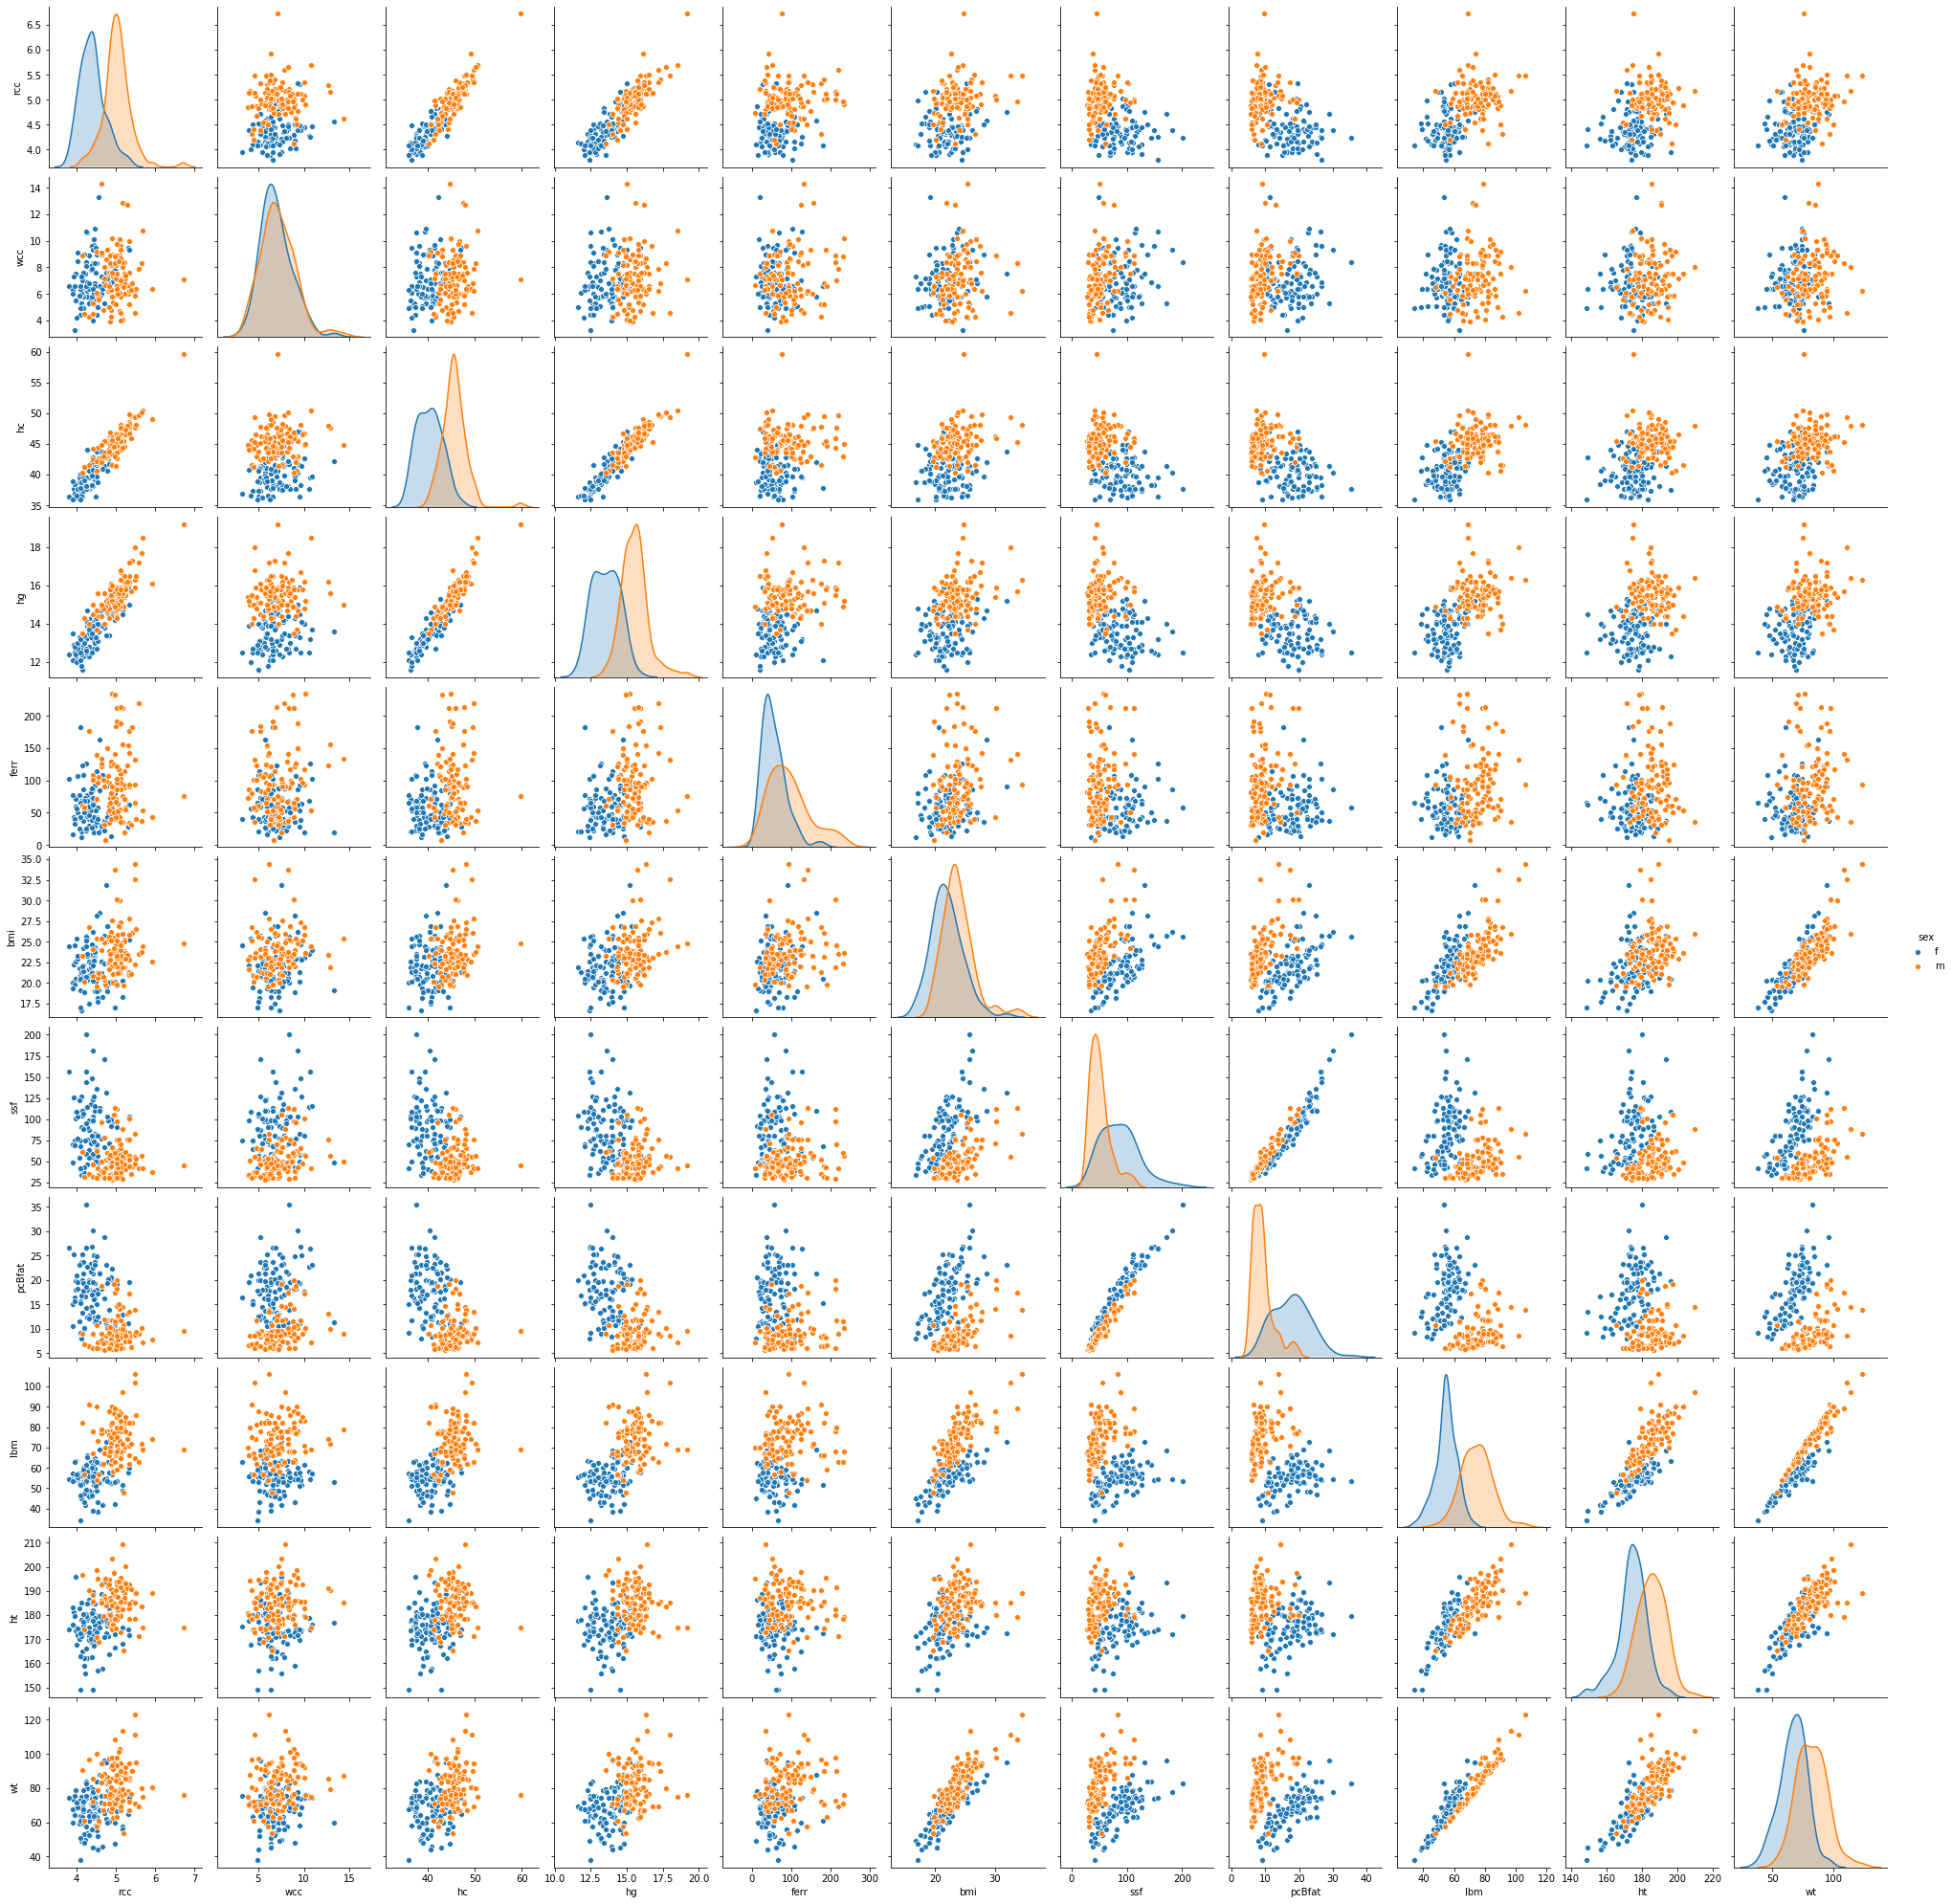

In [12]:
sns.pairplot(ais, hue='sex')

In [13]:
corr_matrix = ais.corr()
corr_matrix

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
rcc,1.000000,0.147064,0.924964,0.888800,0.250865,0.299471,-0.403004,-0.493512,0.550975,0.358854,0.403763
wcc,0.147064,1.000000,0.153333,0.134720,0.132073,0.176968,0.136999,0.107960,0.102663,0.076811,0.155662
hc,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,-0.532449,0.583375,0.371192,0.423711
hg,0.888800,0.134720,0.950757,1.000000,0.308391,0.382524,-0.435429,-0.531522,0.610986,0.352322,0.455263
ferr,0.250865,0.132073,0.258240,0.308391,1.000000,0.302556,-0.108243,-0.183386,0.317581,0.123255,0.273702
bmi,0.299471,0.176968,0.320527,0.382524,0.302556,1.000000,0.321116,0.187558,0.713858,0.337097,0.845934
ssf,-0.403004,0.136999,-0.449135,-0.435429,-0.108243,0.321116,1.000000,0.963017,-0.207749,-0.071253,0.154196
pcBfat,-0.493512,0.107960,-0.532449,-0.531522,-0.183386,0.187558,0.963017,1.000000,-0.361850,-0.188022,-0.000193
lbm,0.550975,0.102663,0.583375,0.610986,0.317581,0.713858,-0.207749,-0.361850,1.000000,0.802119,0.930913
ht,0.358854,0.076811,0.371192,0.352322,0.123255,0.337097,-0.071253,-0.188022,0.802119,1.000000,0.780932


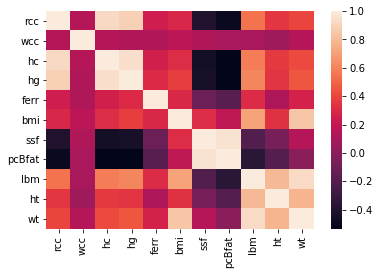

In [14]:
sns.heatmap(corr_matrix)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [15]:
ais.columns

Index(['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht',
       'wt', 'sex', 'sport'],
      dtype='object')

In [16]:
# ANSWER
cluster_features = ['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']

In [17]:
X = ais[cluster_features]
X.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [21]:
from sklearn.preprocessing import StandardScaler

In [26]:
#initialise the scaler
scaler = StandardScaler()

#scale the data
X_std = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [27]:
from sklearn import cluster
from sklearn.cluster import KMeans

In [32]:
kmean_2 = KMeans(n_clusters=2)
kmean_2.fit(X_std)

KMeans(n_clusters=2)

In [33]:
kmean_4 = KMeans(n_clusters=4)
kmean_4.fit(X_std)

KMeans(n_clusters=4)

### 5. Get the labels for the models

In [34]:
# ANSWER
# Labels (2 clusters)
labels_2cluster = kmean_2.labels_
print(labels_2cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
# Labels (4 clusters)
labels_4cluster = kmean_4.labels_
print(labels_4cluster)

[2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 1 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2 1 1 1 1 1 1 0 2 2 2 2 0
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 3 0 3 0
 0 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 0 3 3 3 3 3 0 3 0 0 0 1 0 0 0 3 3 0 0
 0 0 0 0 1 0 1 0 0 0 0 3 0 3 3 0 3 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0 0 3 3 3 3
 3 3 0 3 3 0 3 0 3 3 3 0 3 0 0 0 0]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [36]:
# ANSWER
sum_sq_dist = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    sum_sq_dist.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

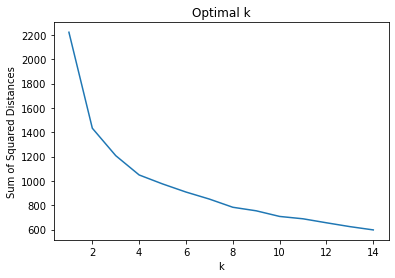

In [39]:
# ANSWER
plt.plot(K, sum_sq_dist)
plt.title('Optimal k')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.show()

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



